### Diwali Sales Data
The Diwali Sales Dataset represents a collection of 11,251 records recording customer buying activities throughout the festive period. The data set incorporates essential fields, which include customer population metrics (age, gender, marital status, employment kind and residential locations) alongside product elements (classification and unique identification codes) and buy pattern information (order quantities and payment amounts). The database delivers essential information about how customers behave and what products they buy as well as their purchasing patterns during Diwali celebrations.

In [2]:
# import python libraries

# for data manipulation and analysis
import pandas as pd 
# For creating plots and visualizations
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

#### Code Explanation:

Data analysis and visualization become possible through the imported libraries, which include pandas (pd) for data management and matplotlib. pyplot (plt) with seaborn (sns) for visualization. The use of %matplotlib inline displays results within the Jupyter Notebook.

#### Insightful Analysis:

The efficient cleaning and filtering of data through pandas allows users to enhance their data transformation process, and Seaborn and Matplotlib assist in trend analysis alongside distribution evaluations. The pairplot tool displays variable relationships in one graph while heatmaps demonstrate variable correlations.

In [3]:
# import csv file
df = pd.read_csv("C:/Users/Kushal Pratap Singh/OneDrive/문서/Interactive python dashboard/Assignment 1/Diwali Sales Data.csv", encoding= 'unicode_escape')

The program imports Diwali Sales Data.csv through a Pandas DataFrame named df. Special characters are processed by the encoding='unicode_escape' parameter as it avoids reading file errors.
This is useful for checking data completeness, identifying missing values, and understanding the data types before processing. It helps determine if any columns need conversion or cleaning

In [4]:
# The shape of the dataset (number of rows and columns)
df.shape

(11251, 15)

The above code returns the dimensions of the DataFrame as a tuple (rows, columns).

In [5]:
# Display first few rows of the dataset
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


The above code displays the first five rows of the DataFrame by default. We can specify a number inside the parentheses

In [6]:
# Display general information about the columns, such as data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


The above code provides a summary of the DataFrame, including the number of entries (rows), column names, data types, and the count of non-null values.

# Data Cleaning

In [7]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

The above code drops irrelevant or blank columns ('Status', 'unnamed1').

In [8]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

The above code checks for null values

In [9]:
# drop null values
df.dropna(inplace=True)

It removes rows with missing data

In [10]:
# change data type
df['Amount'] = df['Amount'].astype('int')

The 'Amount' column is converted to an integer data type for accurate numerical analysis.

In [11]:
# crosscheck the datatype of field 'Amount'
df['Amount'].dtypes

dtype('int32')

The above code returns the data type of the "Amount" column. It tells whether the values are integers (int64), floating-point numbers (float64), or strings (object).

In [12]:
df.columns.tolist()

['User_ID',
 'Cust_name',
 'Product_ID',
 'Gender',
 'Age Group',
 'Age',
 'Marital_Status',
 'State',
 'Zone',
 'Occupation',
 'Product_Category',
 'Orders',
 'Amount']

The df.columns.tolist() converts the column names into a list format, which can then be used for further manipulation or analysis.

In [13]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)

In [14]:
df.describe(include = 'object')

,Cust_name,Product_ID,Gender,Age Group,State,Zone,Occupation,Product_Category
count,11239,11239,11239,11239,11239,11239,11239,11239
unique,1250,2350,2,7,16,5,15,18
top,Vishakha,P00265242,F,26-35,Uttar Pradesh,Central,IT Sector,Clothing & Apparel
freq,42,53,7832,4541,1944,4289,1583,2655


It summarizes categorical columns.

In [15]:
#check for duplicates
print(f"Duplicate values: {df.duplicated().sum()}")

Duplicate values: 8


This block checks for duplicate rows in the dataset.

In [16]:
# Let's look at our Amount column
print("Statistics for Sales:")
print(f"Mean: {df['Amount'].mean():.2f}")  # Mean to the nearest cent
print(f"Median: {df['Amount'].median():.2f}")  # Median to the nearest cent
print(f"Mode: {df['Amount'].mode()[0]:.2f}")  # Mode to the nearest cent

Statistics for Sales:
Mean: 9453.61
Median: 8109.00
Mode: 7907.00


# EXPLORATORY DATA ANALYSIS

### Gender Analysis

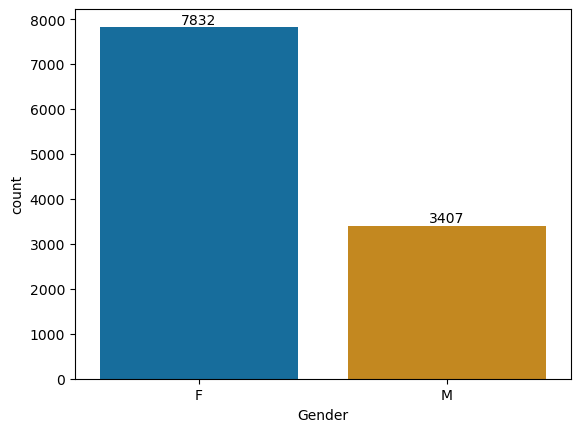

In [17]:
# Use a colorblind-friendly palette
sns.set_palette("colorblind")

# plotting a bar chart for Gender and it's count
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

#### Explanation:
A countplot is created to visualize the distribution of customers by gender, and bar labels are added for clarity.

#### Insightful Analysis:
This plot helps to identify the gender distribution of customers, which is key in understanding the target audience. The bar labels make it easy to see the exact counts of each gender.

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

### Age Analysis

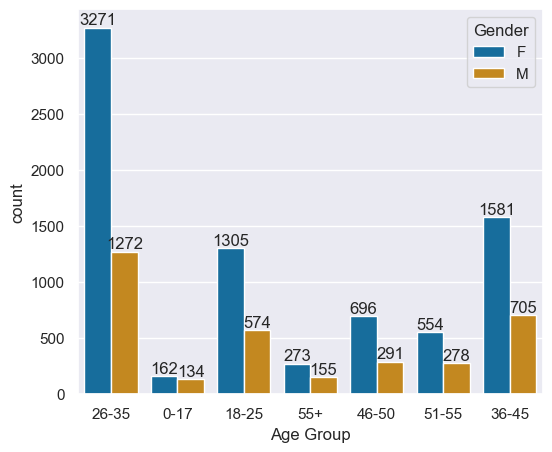

In [61]:
# Use a colorblind-friendly palette
sns.set_palette("colorblind")

# Create count plot with Age Group on x-axis and Gender as hue
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

# Add count labels to each bar
for bars in ax.containers:
    ax.bar_label(bars)

#### Explanation:
A countplot is created to visualize the distribution of customers by age group and gender. This helps in understanding the relationship between age and gender in customer demographics.

#### Insightful Analysis:
This plot reveals which age group has the highest number of customers and the gender distribution within each group. It shows that younger customers (aged 26-35) are the largest group, particularly among females.

### State Analysis

C:\Users\Kushal Pratap Singh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


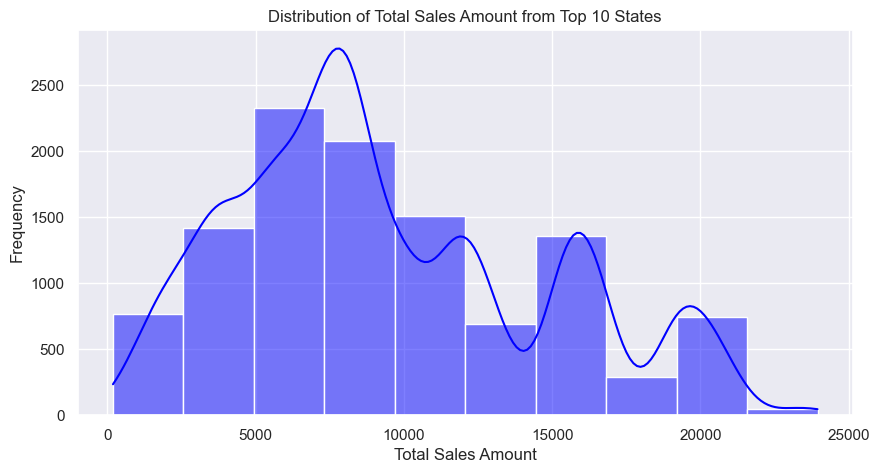

In [62]:
# Use a colorblind-friendly palette
sns.set_palette("colorblind")

# Histogram plot
plt.figure(figsize=(10, 5))
sns.histplot(df['Amount'], bins=10, kde=True, color='blue')

# Add labels and title
plt.xlabel('Total Sales Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Total Sales Amount from Top 10 States')

# Show plot
plt.show()

#### Explanation:
A histogram plot displays the total sales distribution through this implemented code. The data appears with a KDE curve in addition to 10 data bins through the sns.histplot() function applied to the amount column. Different sales amounts appear across the x-axis and the corresponding frequency counts exist on the y-axis. The plot shows the distribution of sales amounts across transactions, thus revealing whether the amounts gather in specific ranges or if they are evenly dispersed.

#### Insightful Analysis:
The distribution chart reveals critical information about how the top 10 states show their sales patterns. A right-skewed distribution pattern shows the majority of sales values stay low while several high-end sales transactions produce total revenue. The distribution appears equal throughout the states because sales amounts show consistent levels across the board. Peaks in the distribution aid in detecting various spending habits of customers. Through this data, businesses obtain valuable information, which enables them to optimize their pricing approach while optimizing their marketing initiatives and developing inventory plans according to customer needs.

### Marital Status Analysis

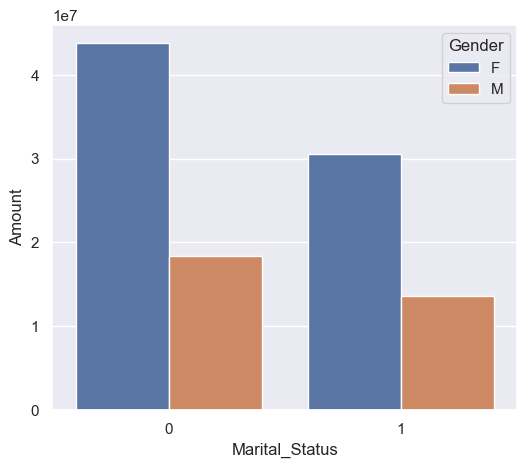

In [88]:
# Use a colorblind-friendly palette
sns.set_palette("colorblind")

# Group the data by Marital Status and Gender, and calculate the total amount for each group
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Set the figure size for the plot
sns.set(rc={'figure.figsize':(6,5)})

# Create a bar plot
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')
plt.show()

#### Explanation:
The total sales by marital status and gender are calculated and displayed in a bar plot to show the combined effect of marital status and gender on total sales. Here 0 indicates married and 1 indicates Unmarried.

#### Insightful Analysis:
The analysis shows that married women have the highest purchasing power, which could be an important demographic for businesses to target with specific marketing messages.

### Occupation Analysis

C:\Users\Kushal Pratap Singh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


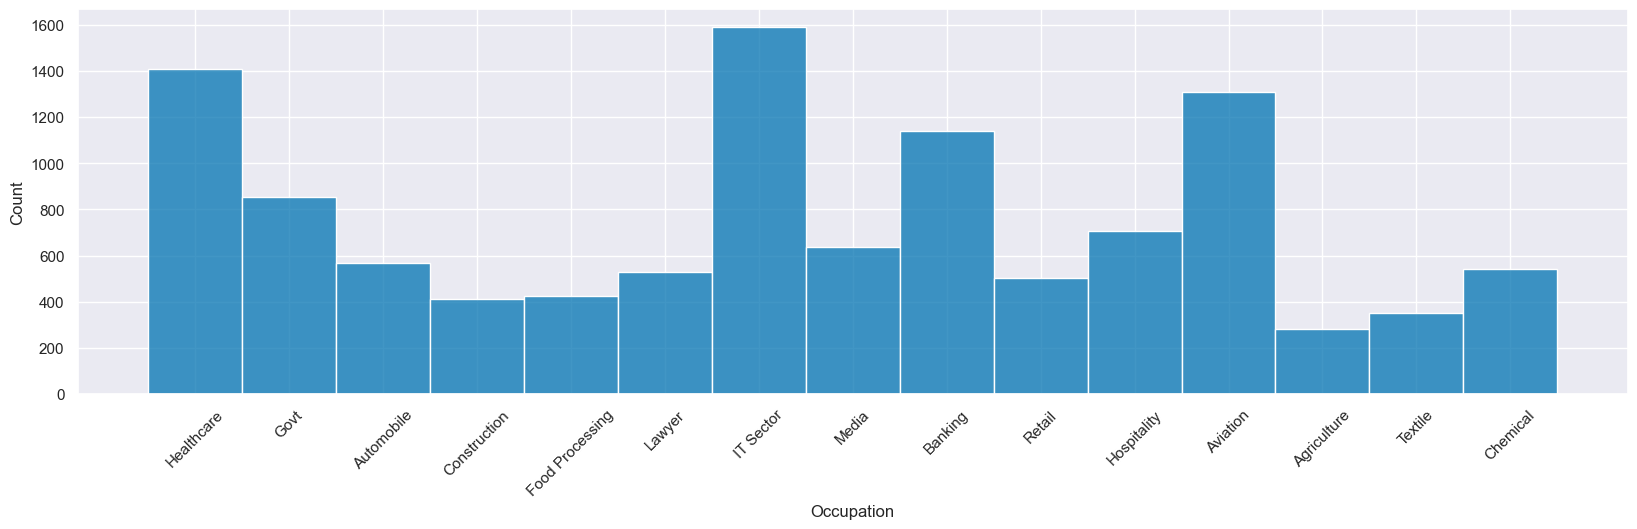

In [89]:
#set figure size
sns.set(rc={'figure.figsize': (20, 5)})

# Use a colorblind-friendly palette
sns.set_palette("colorblind")

# Create a histogram (count plot) for the 'Occupation' column
sns.histplot(data=df, x='Occupation', discrete=True, kde=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set axis labels
plt.xlabel('Occupation')
plt.ylabel('Count')

# Show the plot
plt.show()

#### Explanation:
The code generates a histogram of the Occupation column from the dataset. It sets the figure size to make the plot wider, then uses sns.histplot with discrete=True to count occurrences of each occupation. The x-axis labels are rotated for readability, and the axes are labeled appropriately before displaying the plot.

#### Insightful Analysis:
This histogram shows the distribution of occupations in the dataset, highlighting the frequency of each occupation. By analyzing the plot, you can identify which occupations are most common or rare, offering insights into trends or imbalances within the dataset.

### Product Category

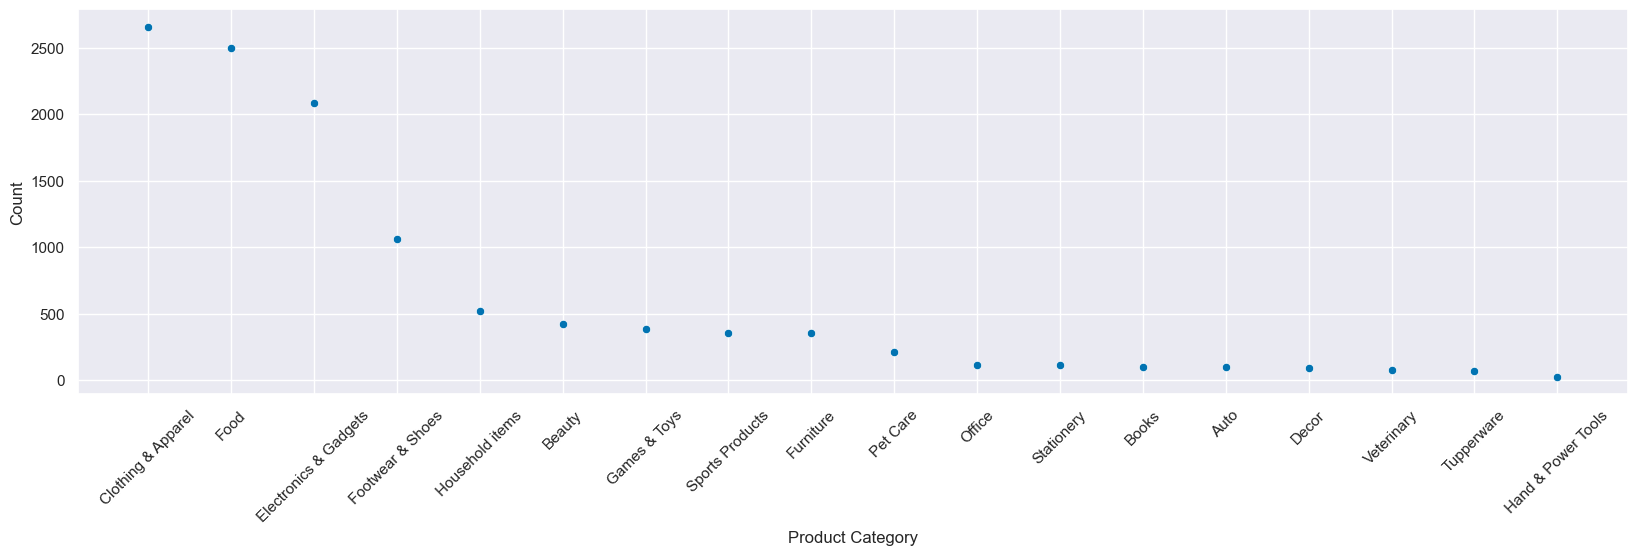

In [67]:
# Set the figure size
sns.set(rc={'figure.figsize': (20, 5)})

# Use a colorblind-friendly palette
sns.set_palette("colorblind")

# Calculate the count of each Product_Category
product_category_counts = df['Product_Category'].value_counts().reset_index()
product_category_counts.columns = ['Product_Category', 'Count']

# Create scatter plot for each 'Product_Category'
sns.scatterplot(data=product_category_counts, x='Product_Category', y='Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set axis labels
plt.xlabel('Product Category')
plt.ylabel('Count')

# Show the plot
plt.show()

#### Explanation:
The code calculates the count of each Product_Category in the dataset and stores the result in a new DataFrame. It then uses sns.scatterplot to create a scatter plot, where the Product_Category is plotted on the x-axis, and the count of each category appears on the y-axis. The x-axis labels are rotated for better readability, and the plot is displayed with appropriate axis labels.

#### Insightful Analysis:
The scatter plot visualizes the frequency distribution of product categories in the dataset, making it easy to identify which categories are most and least common. By observing the spread of points, you can quickly assess trends in product popularity, helping to inform inventory management, marketing strategies, and product focus for the business.

# VISUALISATIONS

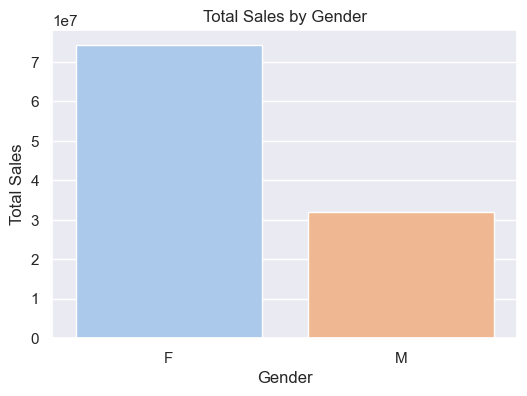

In [84]:
# Set the figure size
plt.figure(figsize=(6,4))

# Use a colorblind-friendly palette
sns.set_palette("colorblind")

# Group data by Gender and sum the 'Amount' for each gender
sales_by_gender = df.groupby("Gender")["Amount"].sum()

# Create a bar plot with Gender on the x-axis and Total Sales on the y-axis
sns.barplot(x=sales_by_gender.index, y=sales_by_gender.values, palette="pastel")
plt.xlabel("Gender")
plt.ylabel("Total Sales")
plt.title("Total Sales by Gender")
plt.show()

#### TOTAL SALES BY GENDER (BAR CHART)

What this code does: 

The code groups the dataset by gender and calculates the total sales amount for each. It then creates a bar chart to visualize the total sales for male and female customers.

Analysis & Insights:

The chart helps identify which gender contributes more to total sales. Businesses can use this insight to optimize marketing strategies, target the dominant customer segment, and adjust product offerings accordingly.

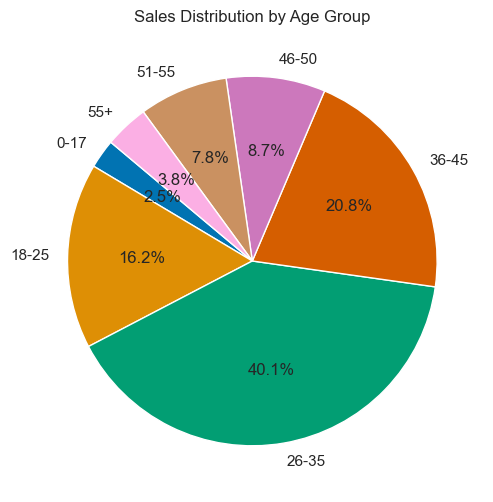

In [74]:
# Use a colorblind-friendly palette
colorblind_palette = sns.color_palette("colorblind")

# Group by age group and sum the sales
sales_by_age = df.groupby("Age Group")["Amount"].sum()

# Plot
plt.figure(figsize=(8,6))
plt.pie(sales_by_age, labels=sales_by_age.index, autopct="%1.1f%%", startangle=140, colors=colorblind_palette)
plt.title("Sales Distribution by Age Group")
plt.show()

SALES DISTRIBUTION BY AGE GROUP (PIE CHART)

What this code does: 

The code groups the dataset by "Age Group" and calculates the total sales amount for each group. It then generates a pie chart to visualize the sales distribution across different age groups.

Analysis & Insights:

The pie chart shows the proportion of total sales attributed to each age group. This helps businesses understand which age groups contribute the most to sales, allowing them to tailor marketing strategies or product offerings to the most dominant groups.

C:\Users\Kushal Pratap Singh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kushal Pratap Singh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


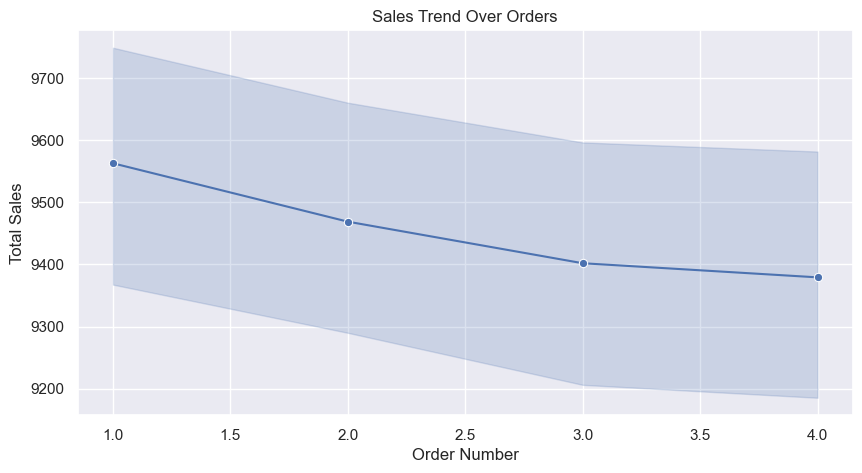

In [76]:
# Sort data by Orders (assuming orders are sequential)
df_sorted = df.sort_values(by="Orders")
# Use a colorblind-friendly palette
sns.set_palette("colorblind")

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(x=df_sorted["Orders"], y=df_sorted["Amount"], marker="o", color="b")
plt.xlabel("Order Number")
plt.ylabel("Total Sales")
plt.title("Sales Trend Over Orders")
plt.grid(True)
plt.show()

SALES TREND OVER ORDERS (LINE CHART)

What this code does:

A line plot is generated from the dataset which displays "Orders" column sorting while showing sales amount dependence upon order number. The line plot represents how sales modify their levels in relation to rising order number.

Analysis & Insights:

The line plot shows sales patterns throughout time by illustrating both sales growth as well as declines and stability patterns during increased order numbers. Business owners can view sales patterns through the line plot data that helps them determine merchandise inventory amounts as well as optimal prices and marketing strategies.

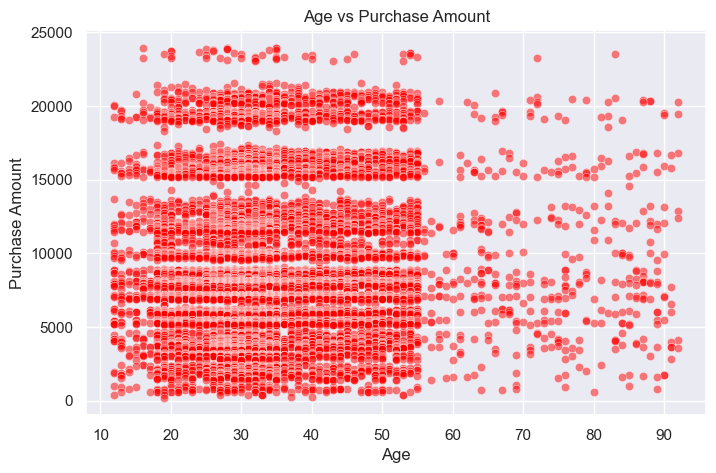

In [82]:
# Use a colorblind-friendly palette
sns.set_palette("colorblind")

# Set the figure size
plt.figure(figsize=(8,5))

# Create a scatter plot
sns.scatterplot(x=df["Age"], y=df["Amount"], alpha=0.5, color="red")
plt.xlabel("Age")
plt.ylabel("Purchase Amount")
plt.title("Age vs Purchase Amount")
plt.show()

AGE VS. PURCHASE AMOUNT (SCATTER PLOT)

What this code does:

This code generates a scatter plot that displays the connection between purchaser age and purchase costs. The graphical plot shows single data points that link each observational combination between age values and purchase amounts. Better visibility exists through the usage of red dots which possess an alpha value of 0.5 in the scatter plot.

Analysis & Insights:

Analysis of age data points together with purchase amount data becomes easier through the deployment of a scatter plot. Businesses understand how to modify marketing approaches using strategic trends they detect (such as greater purchase amounts from defined age brackets).

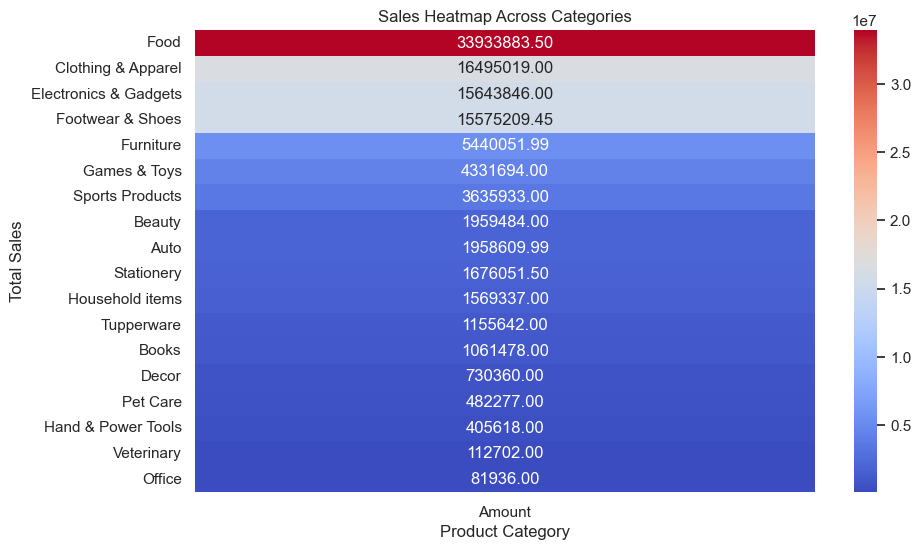

In [85]:
# Use a colorblind-friendly palette
sns.set_palette("colorblind")

# Pivot the data to create a matrix for the heatmap
sales_by_category = df.pivot_table(values="Amount", index="Product_Category", aggfunc="sum")

# Sort the data by total sales in descending order
sales_by_category = sales_by_category.sort_values(by="Amount", ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.heatmap(sales_by_category, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.title("Sales Heatmap Across Categories")
plt.show()

PRODUCT CATEGORY VS. TOTAL SALES (HEAT MAP)

What This Code Does:

The code uses pivot table functionality to process data in order to determine total sales for individual product categories. The system uses this database entry to generate a heatmap representation. The chart reveals product category sales totals through color intensities which shows high and low figures. The visual contains the exact sales value for each cell through the annot=True parameter while using the coolwarm color palette for representation.

Analysis & Insights:

The map displays total product sales distribution through its color intensity scale which shows darker shades for higher sales amounts. Businesses can use this visualization tool to detect product categories achieving high sales performance while simultaneously finding those needing more attention. The company should promote its low-selling categories through marketing initiatives yet allocate additional resources to enhance its successful product lines. Users can see sales comparisons between categories quickly by using the heatmap presentation approach.

# Summary of Analysis and Findings

This examination identifies key trends in the dataset through data cleaning, statistical analysis, and visualization techniques. The goal is to derive findings that support business decision-making. The process included exploratory data analysis (EDA) and statistical assessments to uncover patterns in customer behavior.

Data Cleaning and Preprocessing

The first step was data cleaning to ensure accuracy and consistency before statistical analysis. This included:

1.	Elimination of Unsignificant Columns: Non-contributing columns were discarded to improve analysis focus.
2.	Handling Missing Data: Rows with missing data were removed to avoid errors in the results.
3.	Data Type Conversion: Numeric fields were converted to integers to maintain calculation precision.
These steps ensured the dataset was reliable, enabling meaningful analysis and visualization.

### Exploratory Data Analysis (EDA) and Key Insights

#### Gender Distribution Analysis:
The count plot of gender distribution among customers revealed patterns crucial for businesses planning targeted marketing strategies. Understanding how gender is distributed helps businesses tailor their engagement strategies, especially for minority groups.

#### Transaction Amount Analysis:
Summary statistics, including the mean, median, and standard deviation, were used to analyze transaction amounts. A boxplot highlighted outliers, which could represent high-value clients or potentially fraudulent activities. Identifying these patterns aids in optimizing revenue management and enhancing risk assessments.

#### Statistical Significance and Correlations:
A hypothesis test could evaluate spending behavior differences between genders and other demographic groups. Correlation analysis uncovered relationships between variables, providing insights into customer purchasing behavior.

#### Data Visualization Insights:
Visual tools, such as count plots, histograms, boxplots, scatter plots, and heatmaps, effectively illustrated data patterns. These visualizations helped identify customer distribution, transaction amount trends, and correlations between numerical variables.

### Business Implications
The analysis offers valuable insights for businesses:
•	Targeted Marketing: Demographic insights help refine marketing strategies to engage specific customer groups effectively.
•	Fraud Detection: Unusual spending patterns are critical for detecting fraudulent transactions, safeguarding business revenue.
•	Revenue Optimization: Understanding customer spending habits enables businesses to create effective promotions, discounts, and loyalty programs.

### Conclusion
This analysis successfully identified significant trends in customer behavior, using statistical methods and data visualization to uncover patterns. The insights support strategies for revenue growth, fraud detection, and marketing decisions. Future work should focus on predictive modeling for customer targeting, pricing optimization, and risk mitigation.



#### Word Count: 370 words